# Import Libraries

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [121]:
df = pd.read_csv("diabetes_data_upload.csv")

# Data Info

In [46]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [47]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [48]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   visual blurring     520 non-null    object
 8   Itching             520 non-null    object
 9   Irritability        520 non-null    object
 10  delayed healing     520 non-null    object
 11  partial paresis     520 non-null    object
 12  muscle stiffness    520 non-null    object
 13  Alopecia            520 non-null    object
 14  Obesity             520 non-null    object
 15  class               520 non-null    object
dtypes: int64(1), object(15)
me

In [50]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'visual blurring', 'Itching', 'Irritability',
       'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia',
       'Obesity', 'class'],
      dtype='object')

In [51]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [52]:
df.shape

(520, 16)

# Exploratory Data Analysis (EDA)

In [53]:
import plotly.express as px    # For Creating Interactive graphs

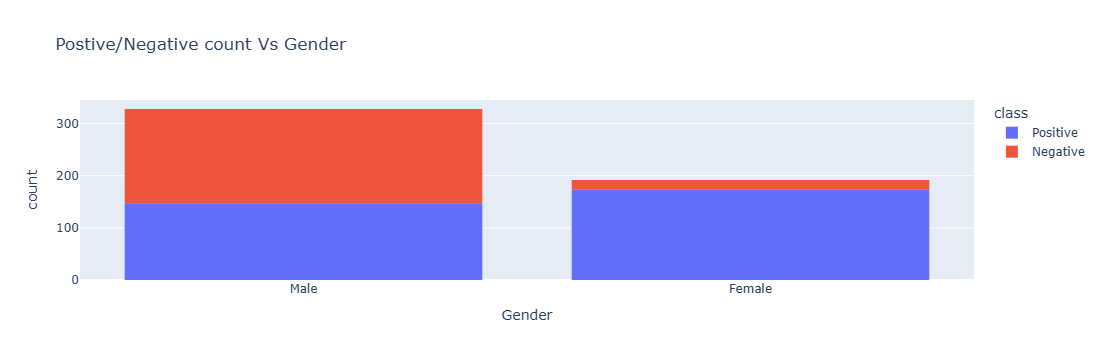

In [54]:
gendis= px.histogram(df, x = 'Gender', color = 'class', title="Postive/Negative count Vs Gender")
gendis.show()  

In [55]:
pltbl= ['Gender', 'class']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[pltbl[0]],df[pltbl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


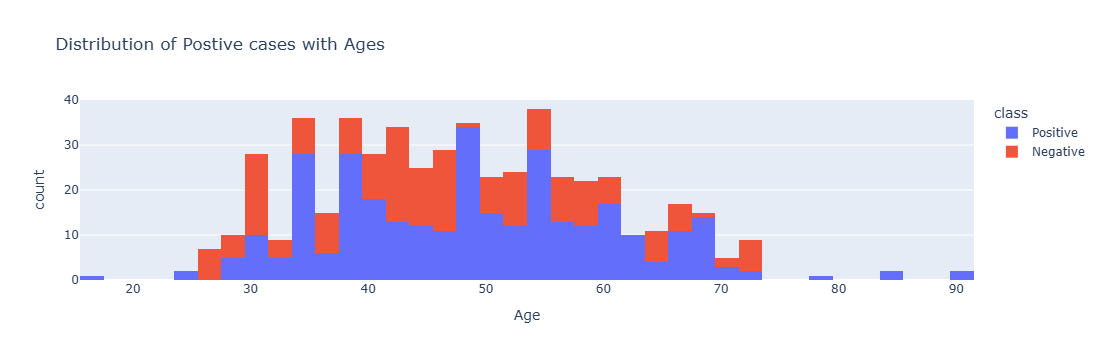

In [56]:
agehist= px.histogram(df, x='Age', color="class", title="Distribution of Postive cases with Ages")
agehist.show()

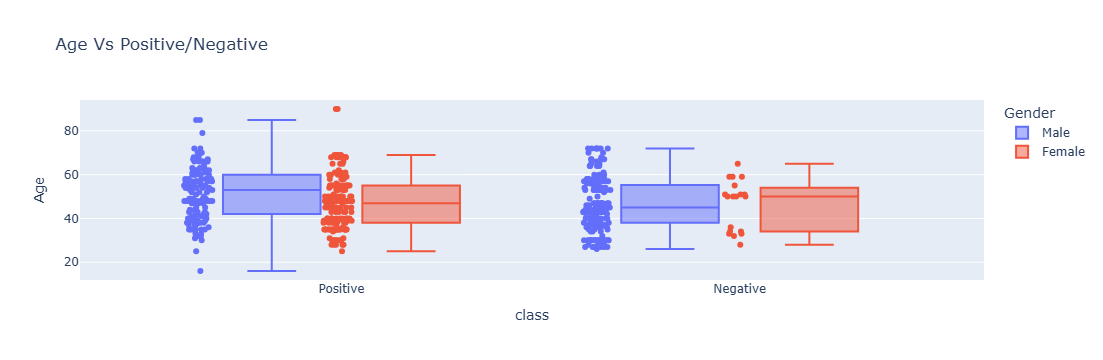

In [57]:
genbox = px.box(df, y="Age", x="class", color="Gender", points="all", title= "Age Vs Positive/Negative")
genbox.show()

## Distribution of class (Target Variable)

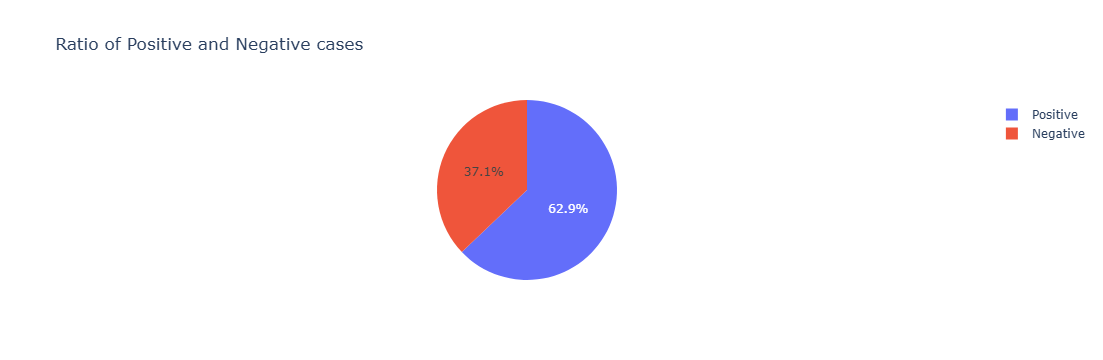

In [58]:
clspi = px.pie(df, values='Age', names='class', title= "Ratio of Positive and Negative cases")
clspi.show()

In [59]:
print("Count of cases:", df['class'].value_counts())

Count of cases: class
Positive    320
Negative    200
Name: count, dtype: int64


## Distribution of polyuria

### Polyuria is a condition characterized by producing an abnormally large amount of urine.

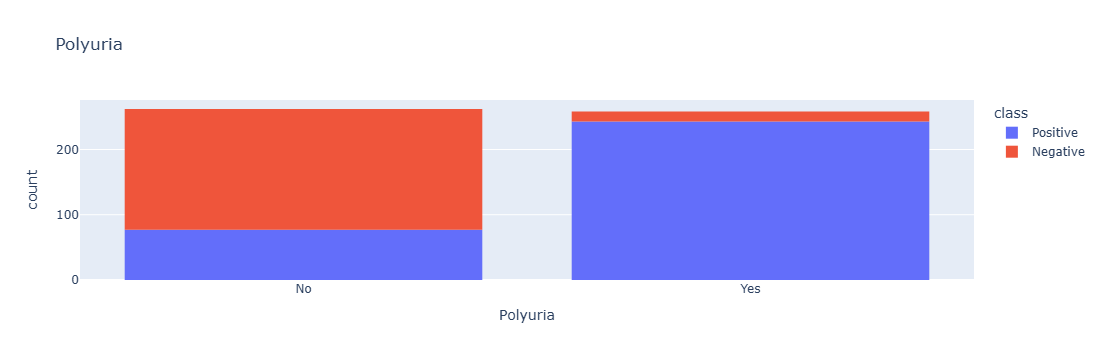

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


In [95]:
polyuria=px.histogram(df, x = 'Polyuria', color = 'class', title="Polyuria")
polyuria.show() 

plttbl_polyuria= ['Polyuria', 'class']
pm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plttbl_polyuria[0]], df[plttbl_polyuria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = pm)

## Distribution of Polydipsia

### Polydipsia is a medical term for excessive thirst, characterized by an abnormal and persistent urge to drink fluids

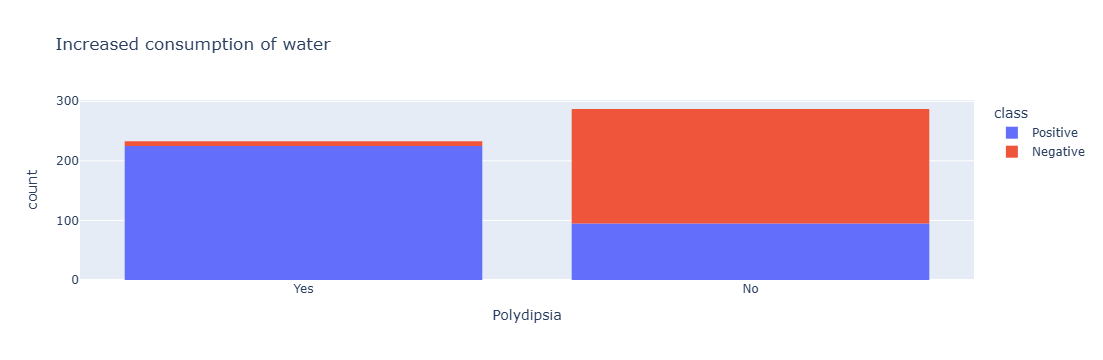

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


In [61]:
polydispia = px.histogram(df, x = 'Polydipsia', color = 'class', title="Increased consumption of water")
polydispia.show() 

plttblpolydispia= ['Polydipsia', 'class']
rm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plttblpolydispia[0]], df[plttblpolydispia[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = rm)

# Distribution of Sudden Weight Loss

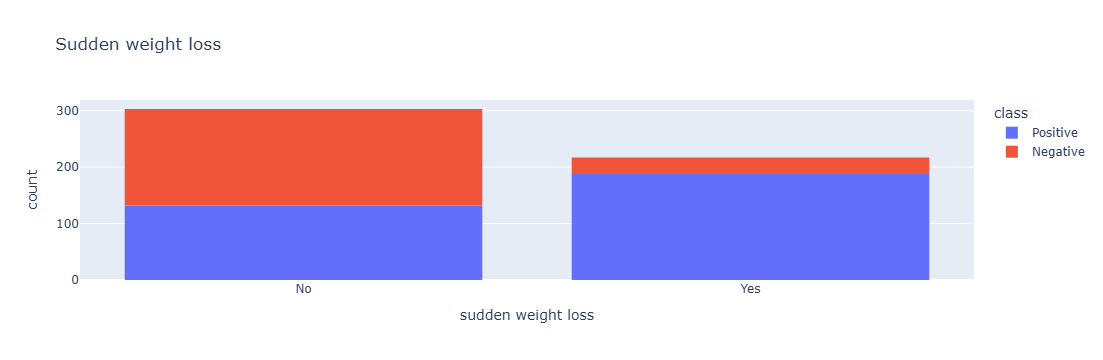

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


In [108]:
swl = px.histogram(df, x = 'sudden weight loss', color = 'class', title="Sudden weight loss")
swl.show() 

plttblswl= ['sudden weight loss', 'class']
qm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plttblswl[0]], df[plttblswl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = qm)

## Distribution of Weakness

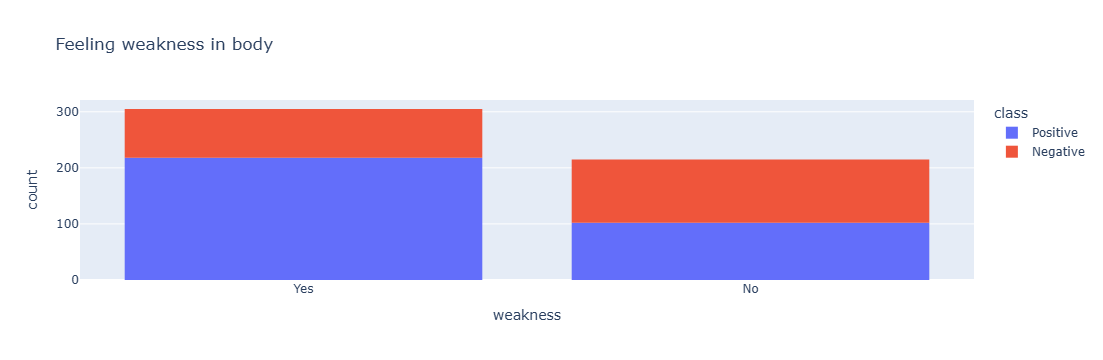

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


In [107]:
wkns = px.histogram(df, x = 'weakness', color = 'class', title="Feeling weakness in body")
wkns.show() 

wkns = ['weakness', 'class']
sm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[wkns [0]],df[wkns [1]], normalize='columns') * 100,2)).style.background_gradient(cmap = sm)

## Distribution of Polyphagia

### Polyphagia is an abnormally strong, incessant sensation of hunger or desire to eat often leading to overeating

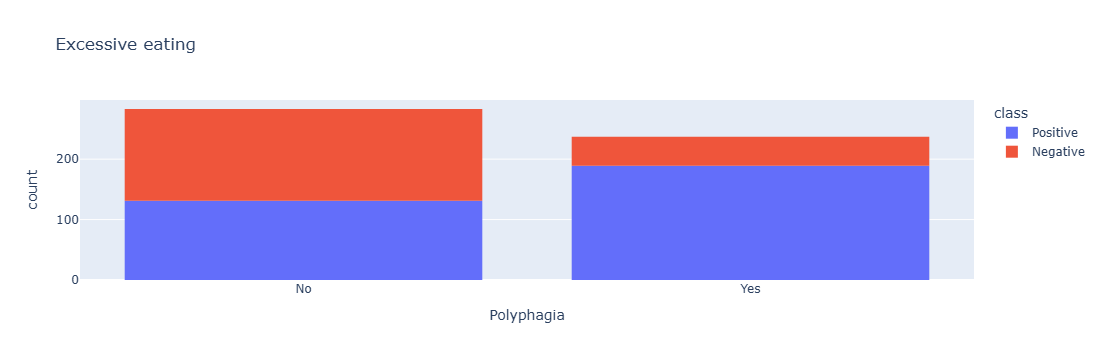

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


In [106]:
eating = px.histogram(df, x = 'Polyphagia', color = 'class', title="Excessive eating")
eating.show() 

plt_eating= ['Polyphagia', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plt_eating[0]], df[plt_eating[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

## Distribution of Visual blurring

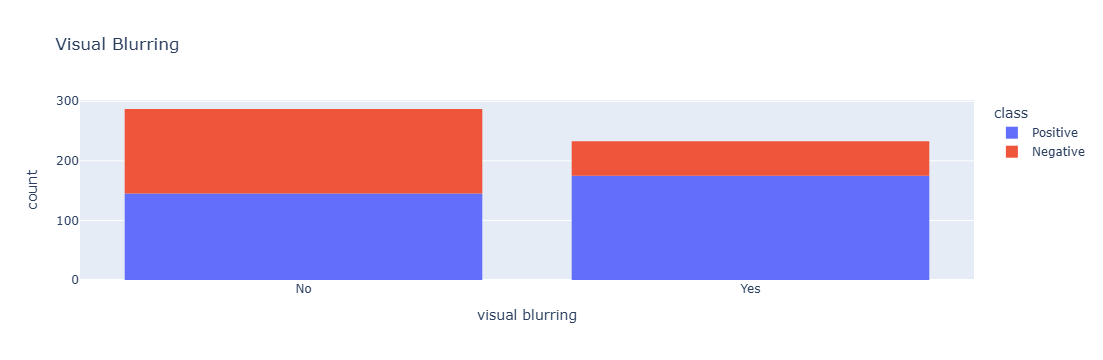

class,Negative,Positive
visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


In [105]:
vb = px.histogram(df, x = 'visual blurring',color='class', title="Visual Blurring")
vb.show()

plt_thrsh= ['visual blurring', 'class']
um = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plt_thrsh[0]], df[plt_thrsh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = um)

## Distribution of Itching

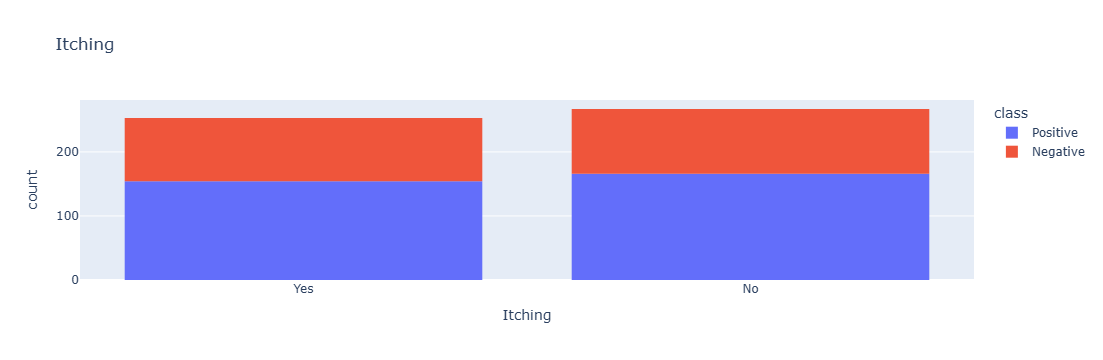

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


In [104]:
itch = px.histogram(df, x = 'Itching',color='class', title="Itching")
itch.show()

plt_thrsh= ['Itching', 'class']
um = sns.light_palette("yellow", as_cmap=True)
(round(pd.crosstab(df[plt_thrsh[0]], df[plt_thrsh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = um)

## Irritability

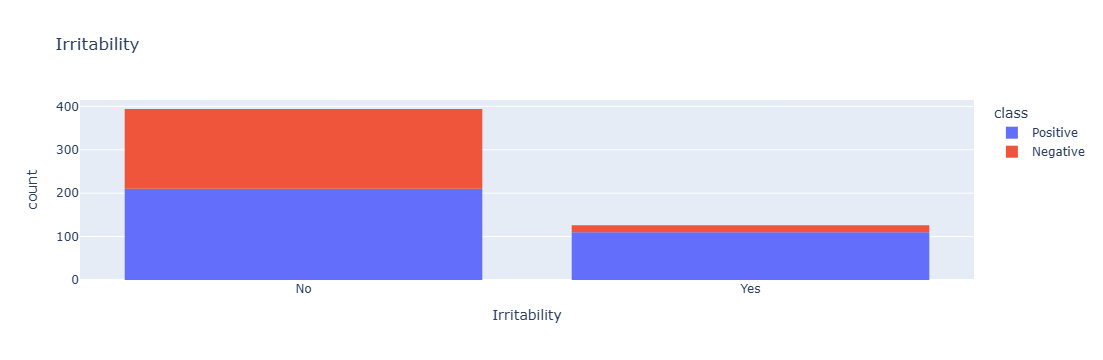

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


In [103]:
irrit = px.histogram(df, x = 'Irritability',color='class', title="Irritability")
irrit.show()

plt_thrsh= ['Irritability', 'class']
um = sns.light_palette("yellow", as_cmap=True)
(round(pd.crosstab(df[plt_thrsh[0]], df[plt_thrsh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = um)

## delayed healing

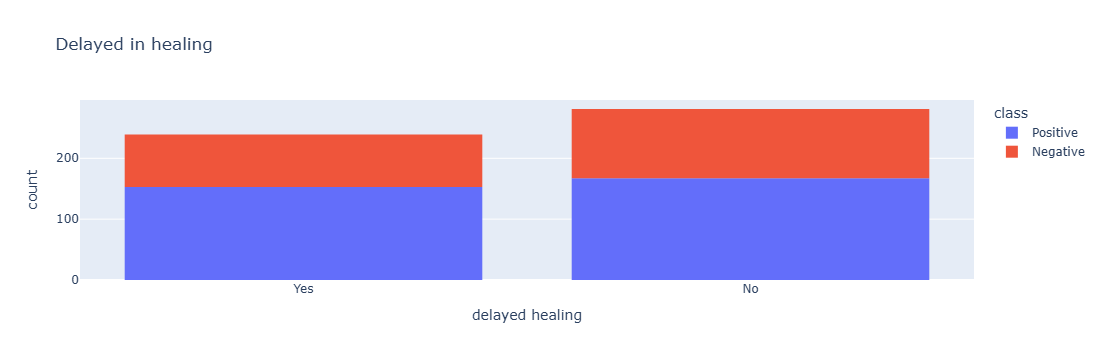

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


In [102]:
dh = px.histogram(df, x = 'delayed healing',color='class', title="Delayed in healing")
dh.show()

plt_thrsh= ['delayed healing', 'class']
um = sns.light_palette("yellow", as_cmap=True)
(round(pd.crosstab(df[plt_thrsh[0]], df[plt_thrsh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = um)

## partial paresis

### Partial paresis, also known as incomplete paralysis, refers to a condition where there is a partial loss of movement or weakness in a limb or body part, but not a complete loss of function. 

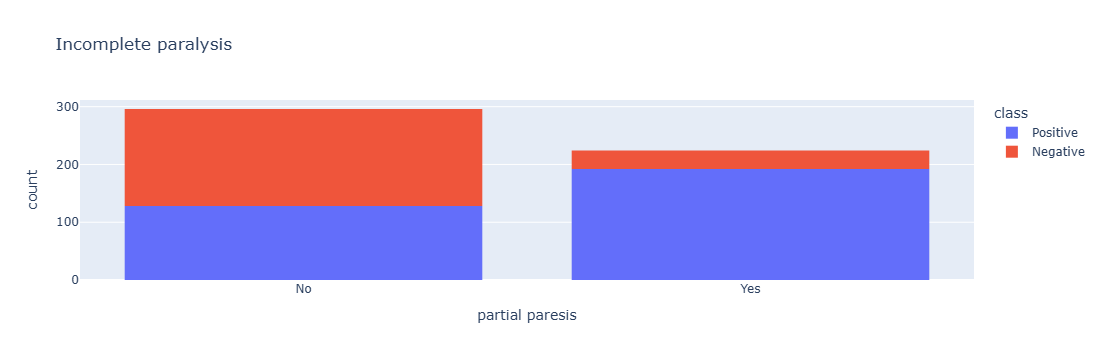

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


In [85]:
pp = px.histogram(df, x = 'partial paresis',color='class', title="Incomplete paralysis")
pp.show()

plt_thrsh= ['partial paresis', 'class']
um = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plt_thrsh[0]], df[plt_thrsh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = um)

## muscle stiffness

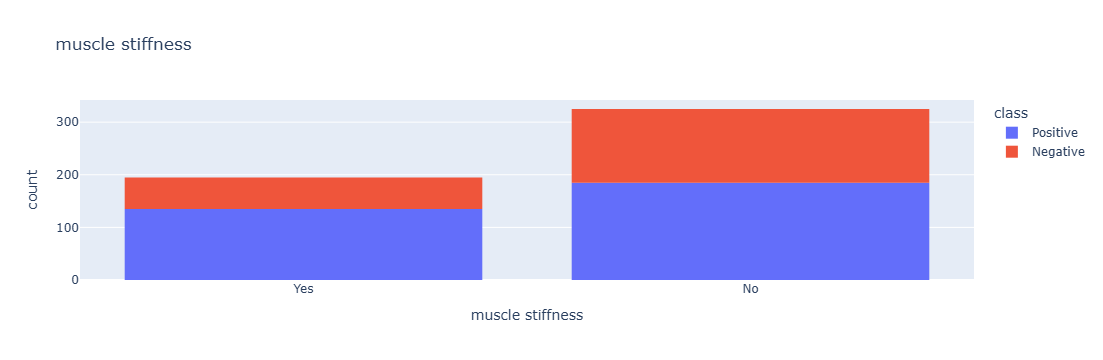

class,Negative,Positive
muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


In [83]:
ms = px.histogram(df, x = 'muscle stiffness',color='class', title="muscle stiffness")
ms.show()

plt_thrsh= ['muscle stiffness', 'class']
um = sns.light_palette("yellow", as_cmap=True)
(round(pd.crosstab(df[plt_thrsh[0]], df[plt_thrsh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = um)

## Alopecia

### Alopecia, in general, refers to hair loss, which can be localized or widespread and temporary or permanent

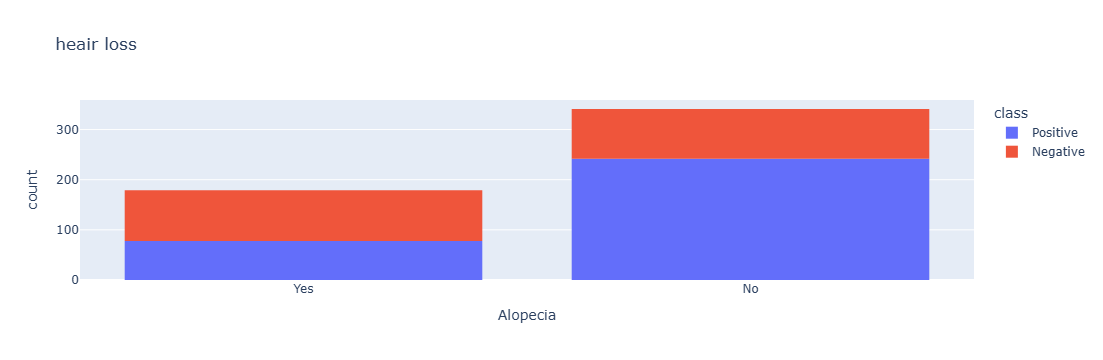

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


In [88]:
alop = px.histogram(df, x = 'Alopecia',color='class', title="heair loss")
alop.show()

plt_thrsh= ['Alopecia', 'class']
um = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plt_thrsh[0]], df[plt_thrsh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = um)

## Obesity

### Obesity is a medical condition characterized by excess body fat accumulation, impacting health and potentially leading to various health complications.

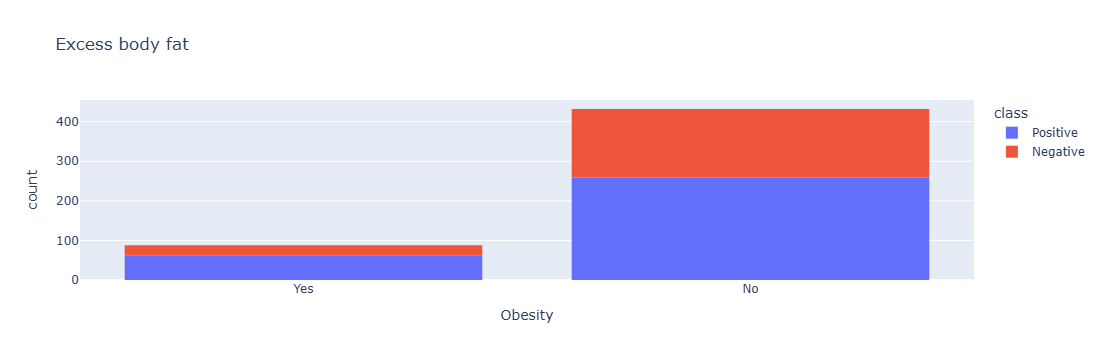

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


In [91]:
obes = px.histogram(df, x = 'Obesity',color='class', title="Excess body fat")
obes.show()

plt_thrsh= ['Obesity', 'class']
um = sns.light_palette("yellow", as_cmap=True)
(round(pd.crosstab(df[plt_thrsh[0]], df[plt_thrsh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = um)

## Data Processing

In [109]:
number = preprocessing.LabelEncoder()

In [110]:
dtacpy1 = df.copy()   # Duplicating the Dataset 
dtacpy1.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [111]:
for i in dtacpy1:
    dtacpy1[i] = number.fit_transform(dtacpy1[i])

In [112]:
dtacpy1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [134]:
# Setting target variable 
X = dtacpy1.drop(['class'],axis=1) # Independent 
y = dtacpy1['class'] # Dependent

In [135]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,16,1,0,1,0,1,0,0,1,0,1,0,1,1,1
1,34,1,0,0,0,1,0,1,0,0,0,1,0,1,0
2,17,1,1,0,0,1,1,0,1,0,1,0,1,1,0
3,21,1,0,0,1,1,1,0,1,0,1,0,0,0,0
4,36,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [136]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int32

Age                   0.106419
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64


<Axes: title={'center': 'Correlation with target variable class'}>

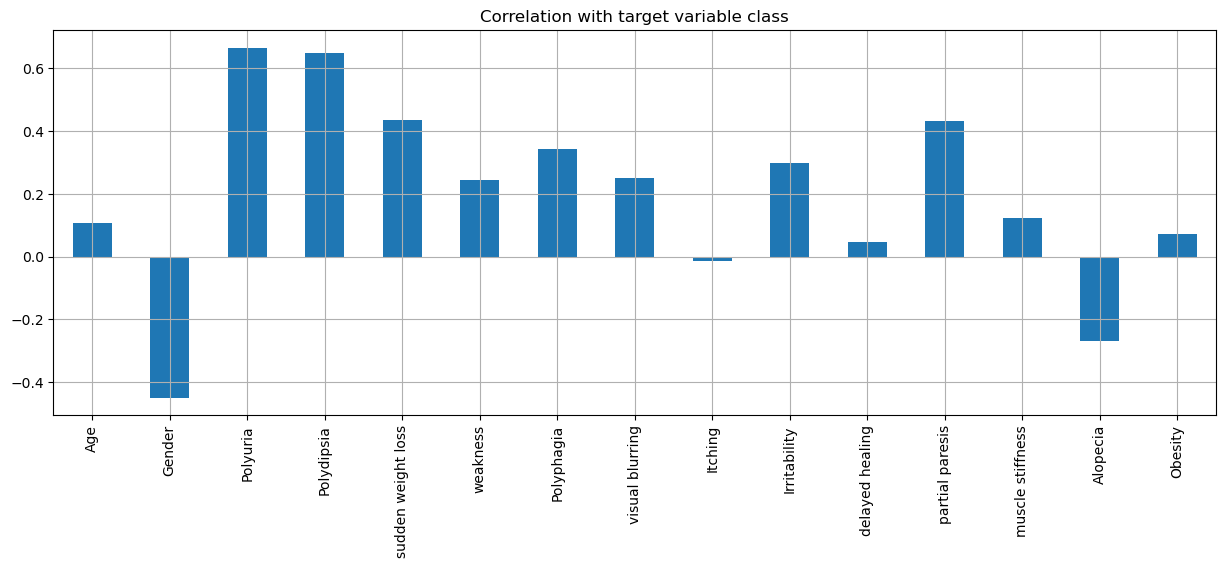

In [137]:
correlation = X.corrwith(Y)

print(correlation)

correlation.plot.bar(title="Correlation with target variable class", grid=True, figsize=(15,5))

In [138]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [139]:
## checking for the distribution of traget variable in train test split
print('Distribution of traget variable in training dataset')
print(Y_train.value_counts())

print('Distribution of traget variable in test dataset')
print(Y_test.value_counts())

Distribution of traget variable in training dataset
class
1    256
0    160
Name: count, dtype: int64
Distribution of traget variable in test dataset
class
1    64
0    40
Name: count, dtype: int64


# Data Normalization

In [141]:
min_max = MinMaxScaler()
X_train[['Age']] = min_max.fit_transform(X_train[['Age']])
X_test[['Age']] = min_max.transform(X_test[['Age']])

In [142]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
374,0.06,1,0,0,0,0,0,0,0,0,0,0,0,0,0
390,0.46,1,0,0,0,0,0,0,0,1,0,1,0,0,1
56,0.84,0,1,1,1,1,1,1,1,0,1,1,1,0,0
272,0.46,1,0,0,0,0,0,0,1,0,0,0,0,1,0
60,0.82,0,1,1,0,1,1,0,1,0,0,1,1,0,0


# Model building

## Logistic Regression

In [143]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [144]:
y_pred = log_reg.predict(X_test)

In [145]:
accuracy_score(y_train, log_reg.predict(X_train))

0.9182692307692307

In [146]:
accuracy_score(y_test, log_reg.predict(X_test))

0.4423076923076923

In [147]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [148]:
confusion_matrix(y_test, y_pred)

array([[40,  0],
       [58,  6]], dtype=int64)

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        40
           1       1.00      0.09      0.17        64

    accuracy                           0.44       104
   macro avg       0.70      0.55      0.38       104
weighted avg       0.77      0.44      0.33       104



### KNN

In [150]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [151]:
y_pred = knn.predict(X_test)

In [152]:
accuracy_score(y_train, knn.predict(X_train))

0.9399038461538461

In [153]:
accuracy_score(y_test, knn.predict(X_test))

0.7884615384615384

In [154]:
knn_acc = accuracy_score(y_test, knn.predict(X_test))

In [155]:
confusion_matrix(y_test, y_pred)

array([[22, 18],
       [ 4, 60]], dtype=int64)

In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.55      0.67        40
           1       0.77      0.94      0.85        64

    accuracy                           0.79       104
   macro avg       0.81      0.74      0.76       104
weighted avg       0.80      0.79      0.78       104



### Decision Tree

In [157]:
DT = DecisionTreeClassifier(
    criterion='entropy',       
    max_depth=5,               
    min_samples_split=10,      
    min_samples_leaf=5,        
    class_weight='balanced'    
)
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [158]:
y_pred = DT.predict(X_test)

In [159]:
accuracy_score(y_train, DT.predict(X_train))

0.9375

In [160]:
accuracy_score(y_test, DT.predict(X_test))

0.9230769230769231

In [161]:
dt_acc = accuracy_score(y_test, DT.predict(X_test))

In [162]:
confusion_matrix(y_test, y_pred)

array([[40,  0],
       [ 8, 56]], dtype=int64)

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        40
           1       1.00      0.88      0.93        64

    accuracy                           0.92       104
   macro avg       0.92      0.94      0.92       104
weighted avg       0.94      0.92      0.92       104



### Random Forest

In [188]:
rand_clf = RandomForestClassifier(
    criterion = 'entropy', 
    max_depth = 15, 
    max_features = 0.75, 
    min_samples_leaf = 2, 
    min_samples_split = 3,
    n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [189]:
y_pred = rand_clf.predict(X_test)

In [190]:
accuracy_score(y_train, rand_clf.predict(X_train))

0.9903846153846154

In [191]:
accuracy_score(y_test, rand_clf.predict(X_test))

0.9807692307692307

In [192]:
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))

In [193]:
confusion_matrix(y_test, y_pred)

array([[40,  0],
       [ 2, 62]], dtype=int64)

In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



### GradientBoosting

In [171]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['log_loss', 'exponential'],         # Loss functions
    'learning_rate': [0.001, 0.1, 1, 10],         # Learning rate (step size)
    'n_estimators': [100, 150, 180, 200]          # Number of boosting stages
}

grid_search_gbc = GridSearchCV(
    gbc,
    parameters,
    cv=10,                  # 10-fold cross-validation
    n_jobs=-1,              # Use all CPU cores (parallel processing)
    verbose=1               # Show progress in the terminal
)

grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [172]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'log_loss', 'n_estimators': 150}

In [173]:
grid_search_gbc.best_score_

0.9833333333333334

In [174]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [175]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)

In [176]:
accuracy_score(y_train, gbc.predict(X_train))

1.0

In [177]:
accuracy_score(y_test, gbc.predict(X_test))

0.9711538461538461

In [178]:
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))

In [179]:
confusion_matrix(y_test, y_pred)

array([[38,  2],
       [ 1, 63]], dtype=int64)

In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.97      0.98      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



# Model Comparison

In [181]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4), 100*round(gbc_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,98.08
4,Gradient Boosting Classifier,97.12
2,Decision Tree Classifier,92.31
1,KNN,78.85
0,Logistic Regression,44.23


In [199]:
import pickle
model = rand_clf
pickle.dump(model, open("diabetes.pkl",'wb'))

In [204]:
feature_names = [
    "Age", "Gender", "Polyuria", "Polydipsia", "sudden weight loss", "weakness",
    "Polyphagia", "visual blurring", "Itching", "Irritability",
    "delayed healing", "partial paresis", "muscle stiffness", "Alopecia", "Obesity"
]

In [208]:
newpat = [[24,1,0,0,0,0,0,0,1,0,0,0,1,0,0]]
input_df = pd.DataFrame(newpat, columns=feature_names)
result = model.predict(input_df)
print("Diabetes Prediction:", result[0])

Diabetes Prediction: 0


In [209]:
model=pickle.load(open('diabetes.pkl','rb'))

In [210]:
newpat = [[16,0,1,0,1,0,0,0,0,1,0,0,1,0,1]]
input_df = pd.DataFrame(newpat, columns=feature_names)
result = model.predict(input_df)
print("Diabetes Prediction:", result[0])

Diabetes Prediction: 1
